In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset-of-10s.csv')

In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


# checking basic integrity

In [4]:
data.shape

(6398, 19)

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
track               6398 non-null object
artist              6398 non-null object
uri                 6398 non-null object
danceability        6398 non-null float64
energy              6398 non-null float64
key                 6398 non-null int64
loudness            6398 non-null float64
mode                6398 non-null int64
speechiness         6398 non-null float64
acousticness        6398 non-null float64
instrumentalness    6398 non-null float64
liveness            6398 non-null float64
valence             6398 non-null float64
tempo               6398 non-null float64
duration_ms         6398 non-null int64
time_signature      6398 non-null int64
chorus_hit          6398 non-null float64
sections            6398 non-null int64
target              6398 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 949.8+ KB


# no. of rows = non null values for each column -> no null value

In [6]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


# checking unique records using uri

In [7]:
# extracting exact id
def extract(x):
    splited_list = x.split(':') # spliting text at colons
    return splited_list[2]      # returning third element
    
data['uri'] = data['uri'].apply(extract)  

In [8]:
data.head() #successfully extracted the id

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


# checking for duplicate rows

In [9]:
data['uri'].nunique(), 

(6378,)

In [10]:
data['uri'].value_counts()


69dXVFCMiz3SL1L7M24NdX    2
6W9W8dSswA8KNegvl3W97V    2
34HwOOG2tTiz6tAN9h83YT    2
21jGcNKet2qwijlDFuPiPb    2
2JJ5h2I1S0UR4tyD0U1I7K    2
                         ..
2zJmZ5RtrFx7nNmuIbvqhv    1
5G47DlluL671zo0k3OhoSm    1
1Faq8G2y56A8fRv7HsLq25    1
5eH1ktZDHgegpkYJOY7tme    1
6D1kEYqdY4D3okAOfeKouI    1
Name: uri, Length: 6378, dtype: int64

In [11]:
data['uri'].value_counts().unique() 

array([2, 1], dtype=int64)

In [12]:
dupe_mask = data['uri'].value_counts()==2

In [13]:
dupe_ids = dupe_mask[dupe_mask]

dupe_ids.value_counts,  dupe_ids.shape  

(<bound method IndexOpsMixin.value_counts of 69dXVFCMiz3SL1L7M24NdX    True
 6W9W8dSswA8KNegvl3W97V    True
 34HwOOG2tTiz6tAN9h83YT    True
 21jGcNKet2qwijlDFuPiPb    True
 2JJ5h2I1S0UR4tyD0U1I7K    True
 3N5oiETJEStSB71TjTFkWV    True
 0JXXNGljqupsJaZsgSbMZV    True
 0iA1unTbTbDOWUSlbwJ1pS    True
 7EZPH9Px3gXlxD5KJDwtwc    True
 3HVWdVOQ0ZA45FuZGSfvns    True
 047fCsbO4NdmwCBn8pcUXl    True
 7fCNUWi6uflDTQ08srxMZk    True
 1GeNui6m825V8jP4uKiIaH    True
 7zBQRGpYImAdIZc97FNj3V    True
 2fQ6sBFWaLv2Gxos4igHLy    True
 6qn9YLKt13AGvpq9jfO8py    True
 2gwkD6igEhQbDQegRCcdoB    True
 4jtyUzZm9WLc2AdaJ1dso7    True
 5KONnBIQ9LqCxyeSPin26k    True
 4Km5HrUvYTaSUfiSGPJeQR    True
 Name: uri, dtype: bool>, (20,))

In [14]:
#converting duplicate ids into a list
dupe_ids  = dupe_ids.index
dupe_ids = dupe_ids.tolist()
dupe_ids

['69dXVFCMiz3SL1L7M24NdX',
 '6W9W8dSswA8KNegvl3W97V',
 '34HwOOG2tTiz6tAN9h83YT',
 '21jGcNKet2qwijlDFuPiPb',
 '2JJ5h2I1S0UR4tyD0U1I7K',
 '3N5oiETJEStSB71TjTFkWV',
 '0JXXNGljqupsJaZsgSbMZV',
 '0iA1unTbTbDOWUSlbwJ1pS',
 '7EZPH9Px3gXlxD5KJDwtwc',
 '3HVWdVOQ0ZA45FuZGSfvns',
 '047fCsbO4NdmwCBn8pcUXl',
 '7fCNUWi6uflDTQ08srxMZk',
 '1GeNui6m825V8jP4uKiIaH',
 '7zBQRGpYImAdIZc97FNj3V',
 '2fQ6sBFWaLv2Gxos4igHLy',
 '6qn9YLKt13AGvpq9jfO8py',
 '2gwkD6igEhQbDQegRCcdoB',
 '4jtyUzZm9WLc2AdaJ1dso7',
 '5KONnBIQ9LqCxyeSPin26k',
 '4Km5HrUvYTaSUfiSGPJeQR']

In [15]:
duplicate_index = data.loc[data['uri'].isin(dupe_ids),:].index  # all the duplicted records
duplicate_index = duplicate_index.tolist()

# We will be removing all the duplication as they are few compared to data

In [16]:
data.drop(duplicate_index,axis=0,inplace=True)
data.shape

(6358, 19)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6358 entries, 0 to 6397
Data columns (total 19 columns):
track               6358 non-null object
artist              6358 non-null object
uri                 6358 non-null object
danceability        6358 non-null float64
energy              6358 non-null float64
key                 6358 non-null int64
loudness            6358 non-null float64
mode                6358 non-null int64
speechiness         6358 non-null float64
acousticness        6358 non-null float64
instrumentalness    6358 non-null float64
liveness            6358 non-null float64
valence             6358 non-null float64
tempo               6358 non-null float64
duration_ms         6358 non-null int64
time_signature      6358 non-null int64
chorus_hit          6358 non-null float64
sections            6358 non-null int64
target              6358 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 993.4+ KB


In [18]:
print("shape of data",data.shape )
print("no. of unique rows",data['uri'].nunique()) # no duplicates

shape of data (6358, 19)
no. of unique rows 6358


In [19]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


# now we will be dropping all the unnecessary columns which contain string which cant be eficiently converted into numerics

In [20]:
data.drop(['track','artist','uri'],axis=1,inplace=True)

In [21]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


# Univariate analysis

<AxesSubplot:xlabel='target', ylabel='count'>

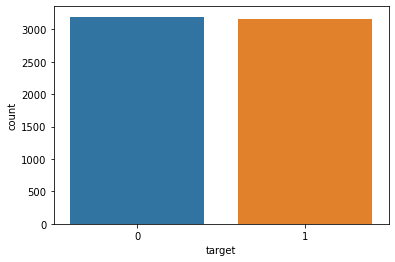

In [22]:
#analysing class imbalance
sns.countplot(data=data,x='target') 

In [23]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target'],
      dtype='object')

In [24]:
# checking appropriate data type
data[['danceability', 'energy', 'key', 'loudness']].info() # every feature have appropriate datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6358 entries, 0 to 6397
Data columns (total 4 columns):
danceability    6358 non-null float64
energy          6358 non-null float64
key             6358 non-null int64
loudness        6358 non-null float64
dtypes: float64(3), int64(1)
memory usage: 568.4 KB


In [25]:
# checking range of first 4 features 
data[['danceability', 'energy', 'key', 'loudness']].describe()


,danceability,energy,key,loudness
count,6358.000000,6358.000000,6358.000000,6358.000000
mean,0.567236,0.667741,5.277131,-7.598630
std,0.190947,0.241216,3.602686,5.243845
min,0.062200,0.000251,0.000000,-46.655000
25%,0.446000,0.532000,2.000000,-8.427750
50%,0.587000,0.713000,5.000000,-6.109000
75%,0.709000,0.857000,8.000000,-4.604250
max,0.981000,0.999000,11.000000,-0.149000


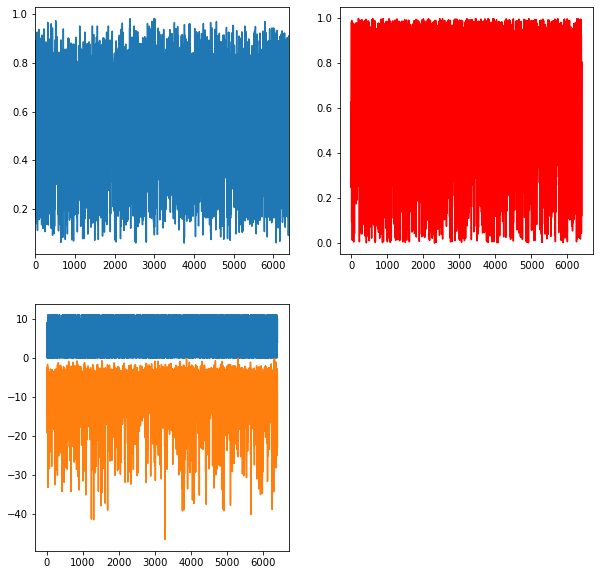

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data['danceability'].plot()
plt.subplot(2,2,2)
plt.plot(data['energy'],color='red')
plt.subplot(2,2,3)
plt.plot(data[['key','loudness']])


#  danceabilty is well inside the range(0,1)
# energy is well inside the range(0,1)
# there's no -1 for keys-> every track has been assigned respective keys
# loudness values are out of range(0,-60)db

In [27]:
loudness_error_idnex = data[data['loudness']>0].index
loudness_error_idnex

Int64Index([], dtype='int64')

In [28]:
 # removing rows with out of range values in loudness column
data.drop(loudness_error_idnex,axis=0, inplace=True)

In [29]:
data.shape  # record is removed 

(6358, 16)

In [30]:
# checking appropriate datatype for next 5 columns
data[['mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',]].info() # datatypes are in acoordance with provided info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6358 entries, 0 to 6397
Data columns (total 5 columns):
mode                6358 non-null int64
speechiness         6358 non-null float64
acousticness        6358 non-null float64
instrumentalness    6358 non-null float64
liveness            6358 non-null float64
dtypes: float64(4), int64(1)
memory usage: 298.0 KB


In [31]:
data[['mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',]].describe() # every feautre is within range

,mode,speechiness,acousticness,instrumentalness,liveness
count,6358.000000,6358.000000,6358.000000,6358.000000,6358.000000
mean,0.645486,0.097724,0.217335,0.166330,0.196933
std,0.478403,0.096997,0.297198,0.319468,0.166145
min,0.000000,0.022500,0.000000,0.000000,0.016700
25%,0.000000,0.038800,0.008495,0.000000,0.096800
50%,1.000000,0.057000,0.067100,0.000017,0.126000
75%,1.000000,0.112000,0.312000,0.061250,0.249000
max,1.000000,0.956000,0.996000,0.995000,0.982000


<AxesSubplot:xlabel='mode', ylabel='count'>

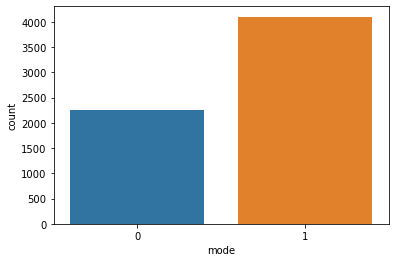

In [32]:
sns.countplot(x=data['mode']) # have only two possible values 0 and 1, no noise in the feature

In [33]:
data[['valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']].info() # data type is in accordance with provided info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6358 entries, 0 to 6397
Data columns (total 6 columns):
valence           6358 non-null float64
tempo             6358 non-null float64
duration_ms       6358 non-null int64
time_signature    6358 non-null int64
chorus_hit        6358 non-null float64
sections          6358 non-null int64
dtypes: float64(3), int64(3)
memory usage: 667.7 KB


In [34]:
data[['valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']].describe() # all the data are in specified range

,valence,tempo,duration_ms,time_signature,chorus_hit,sections
count,6358.000000,6358.000000,6.358000e+03,6358.000000,6358.000000,6358.000000
mean,0.443013,122.394097,2.368038e+05,3.930167,41.069345,10.314722
std,0.245899,29.861650,8.578725e+04,0.378142,19.592429,3.780455
min,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000
25%,0.240000,98.168000,1.932068e+05,4.000000,28.092815,8.000000
50%,0.432000,121.182500,2.213760e+05,4.000000,36.301590,10.000000
75%,0.628000,141.213000,2.593165e+05,4.000000,48.304972,12.000000
max,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000


# Performing F-test to know the relation between every feature and target

In [35]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [36]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x.shape,y.shape

((6358, 15), (6358,))

In [37]:
from sklearn.feature_selection import f_classif
f_stat,p_value = f_classif(x,y) 

In [38]:
feat_list = data.iloc[:,:-1].columns.tolist()

In [39]:
# making a dataframe
dict = {'Features':feat_list,'f_statistics':f_stat,'p_value':p_value}
relation = pd.DataFrame(dict)
relation.sort_values(by='p_value')

,Features,f_statistics,p_value
7,instrumentalness,2109.329983,0.000000e+00
0,danceability,1094.561573,1.312621e-221
3,loudness,763.161171,9.644105e-159
9,valence,270.354516,1.588237e-59
11,duration_ms,235.389106,3.402140e-52
6,acousticness,225.398804,4.307665e-50
12,time_signature,103.224839,4.565623e-24
14,sections,84.042469,6.419702e-20
5,speechiness,59.717114,1.264874e-14
13,chorus_hit,44.244782,3.139348e-11


# Multivariate analysis

In [40]:
correlation = data.corr()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

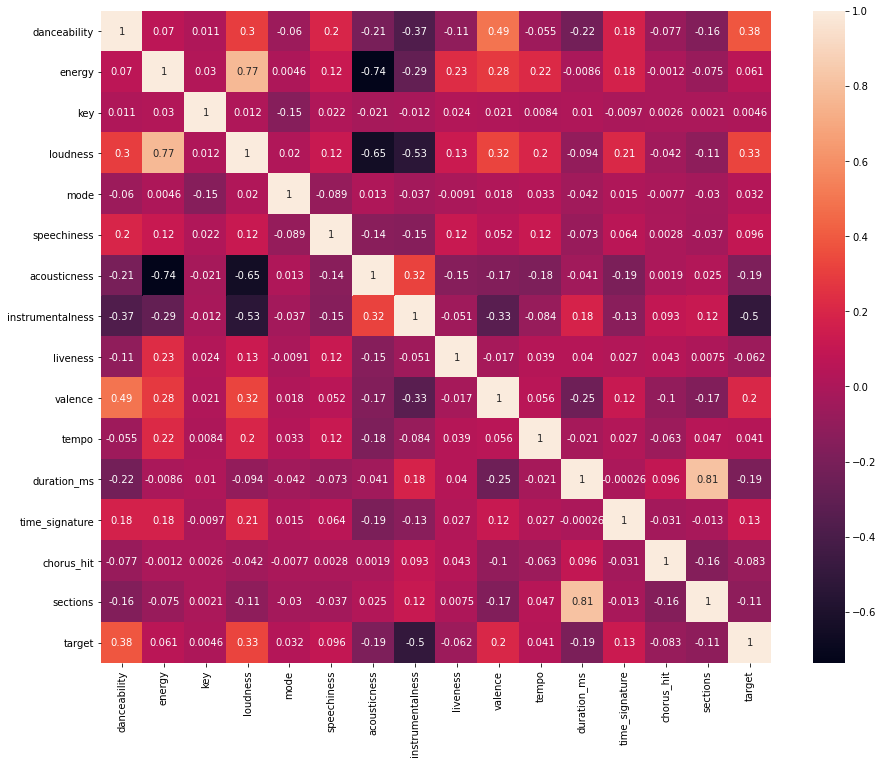

In [41]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True)
plt.tight_layout

# strong features(accordance with f-test) --> 
danceability,  loudness,  acousticness,  instrumentalness,  valence

# less imortant feature(accordance with f-test)-->
duration,  section,  mode,  time_signature,  chorus hit

# least imortant-->  
energy,key,speecheness,liveliness,tempo